In [1]:
import sys

import numpy as np
import netCDF4 as nc
import numpy.matlib
import datetime
import xarray as xr
from scipy import interpolate
from numpy import ma
from scipy import stats
import scipy.io as sio
import pickle as pickle
from sklearn import linear_model
import numpy.ma as ma
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

import scipy as sp
import pandas as pd

import time

from copy import copy 

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import make_axes_locatable

# OS interaction
import os
import sys
import cftime

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

import matplotlib.colors as mcolors

import glob
import dask
import dask.bag as db

from scipy import interpolate

import statsmodels.stats.multitest as multitest

from matplotlib.gridspec import GridSpec
from cartopy.crs import EqualEarth, PlateCarree

In [2]:
esa_path = '/glade/u/home/zcleveland/scratch/ESA_data/COMBINED/' # base path to full ESA dataset I downloaded
out_path = '/glade/u/home/zcleveland/scratch/ESA_data/dsw/' # base path to save the subsetted data

In [3]:
files = glob.glob(f'{out_path}ESA*.nc')
files.sort()

In [4]:
esa = xr.open_mfdataset(files)

In [5]:
# function to plot data for a given year, month, and day
def esa_plot_day(year, month, day):
    # select data for the specified date
    dayta = esa['sm'].sel(time=f'{year}-{month:02d}-{day:02d}')
    
    # plot the data
    plt.figure(figsize=(8, 6))
    dayta.plot()
    plt.title(f'Data for {year}-{month:02d}-{day:02d}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


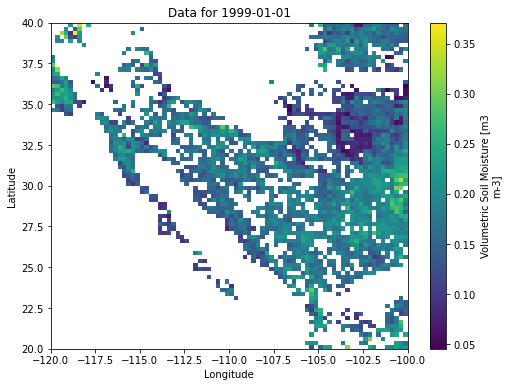

In [6]:
year = 1999
month = 1
day = 1
esa_plot_day(1999,1,1)

In [6]:
year = 1999
month = 1
day = 1
data = esa['sm'].sel(time=f'{year}-{month:02d}-{day:02d}')
flag = esa['flag'].sel(time=f'{year}-{month:02d}-{day:02d}')
mask = flag == 0

In [7]:
data_masked = data.where(mask)

In [9]:
print(data.values[0][0])
print(data_masked.values[0][0])

nan
nan


In [21]:
(str(data.values[0][0]) == str(data_masked.values[0][0]))

True

In [23]:
(str(data.values) == str(data_masked.values))

True